# Ingest and Plot NASA Data

In [1]:
from datetime import datetime, timezone
import fsspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import pandas as pd
from scipy.interpolate import make_interp_spline

from ormhw.core import *
from ormhw.nasa import OC

## Setup Colormap

In [2]:
cmap = plt.cm.jet 
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (0, 0, 0, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 10, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

## Setup Custom Class

In [3]:
oc = OC()

## CHL Composites

In [4]:
figure_directory = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures"
os.makedirs(figure_directory, exist_ok = True)
figure_save_filepath = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures/nasa_chl_composites.png"

/home/jovyan/oregon-shelf-mhw/oregon-shelf-mhw/ormhw/nasa.py:142: RuntimeWarning: Mean of empty slice
  mean_chl = np.nanmean(chls,axis = 0)


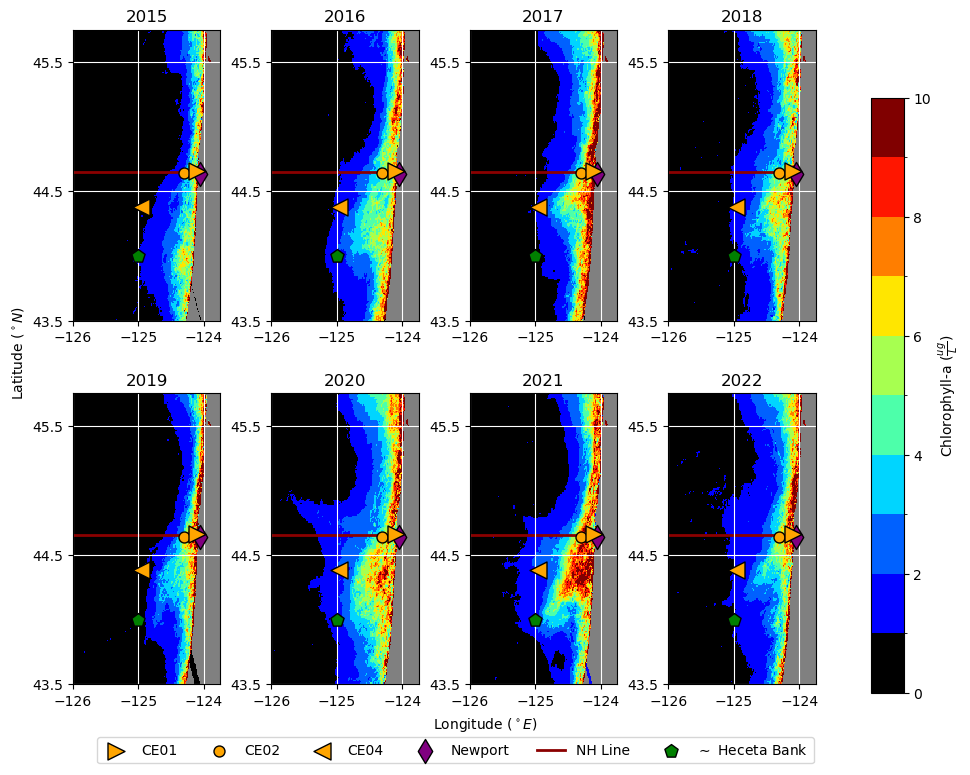

In [5]:
years = range(2015,2023)
fig = plt.figure(figsize = (11,8.5))
grid = (2,4)
ax1 = plt.subplot2grid(grid, (0,0), colspan = 1,rowspan = 1)
ax2 = plt.subplot2grid(grid, (0,1), colspan = 1,rowspan = 1)
ax3 = plt.subplot2grid(grid, (0,2), colspan = 1,rowspan = 1)
ax4 = plt.subplot2grid(grid, (0,3), colspan = 1,rowspan = 1)
ax5 = plt.subplot2grid(grid, (1,0), colspan = 1,rowspan = 1)
ax6 = plt.subplot2grid(grid, (1,1), colspan = 1,rowspan = 1)
ax7 = plt.subplot2grid(grid, (1,2), colspan = 1,rowspan = 1)
ax8 = plt.subplot2grid(grid, (1,3), colspan = 1,rowspan = 1)
axs = [ax1,ax2,ax3,ax4,ax5,ax6, ax7,ax8]

for year in years:
    idx = years.index(year)
    ax = axs[idx]
    ax.set_facecolor('gray')
    
    jds = datetime.strptime(f'{year}-190', '%Y-%j')
    jde = datetime.strptime(f'{year}-280', '%Y-%j')
    lat, lon, chl= oc.aggregate_oc(jds,jde)    
    
    p = ax.pcolormesh(lon,lat,chl,cmap = cmap,norm=norm)
    
    ax.set_title(str(year))
    ax.set_xlim([-126,-123.75])
    ax.set_ylim([43.5,45.75])
    ax.grid(color = 'white',)

    ax.set_yticks([43.5,44.5,45.5])
    ax.set_xticks([-126,-125,-124])
    
    ax.scatter(CE01_LOC[1], CE01_LOC[0], marker = '>', label = 'CE01', edgecolors = 'black',facecolors = 'orange', s= 150,zorder = 3)
    ax.scatter(CE02_LOC[1], CE02_LOC[0], marker = '.', label = 'CE02', edgecolors = 'black',facecolors = 'orange', s= 250,zorder = 2)
    ax.scatter(CE04_LOC[1], CE04_LOC[0], marker = '<', label = 'CE04', edgecolors = 'black',facecolors = 'orange', s = 150,zorder = 2)
    # ax.scatter(BLANCO_LOC[1], BLANCO_LOC[0], marker = '*', label = 'Cape Blanco', edgecolors = 'black',facecolors = 'red', s = 150,zorder = 2)
    ax.scatter(NEWPORT_LOC[1], NEWPORT_LOC[0], marker = 'd', label = 'Newport', edgecolors = 'black',facecolors = 'purple', s = 150,zorder = 2)
    # ax.scatter(CR_LOC[1], CR_LOC[0], marker = 'P', label = 'Columbia R.', edgecolors = 'black',facecolors = 'blue', s = 100,zorder = 2)
    ax.plot(NH_LINE[1],(NH_LINE[0],NH_LINE[0]), color = 'darkred', zorder = 1,linewidth = 2,label = 'NH Line')
    ax.scatter(HECETA_LOC[1], HECETA_LOC[0], marker = 'p', label = r'$\sim$ Heceta Bank', edgecolors = 'black',facecolors = 'green', s = 100,zorder = 2)

    if year == 2019:
        _handles, _labels = ax.get_legend_handles_labels()
        
fig.subplots_adjust(right=0.8,wspace = 0.35, hspace = 0.25)
cbar_ax = fig.add_axes([0.85, 0.1, 0.03, 0.7])
fig.colorbar(p, cax=cbar_ax,label = r'Chlorophyll-a ($\frac{ug}{L}$)')

fig.legend(_handles, _labels, ncol = 10, loc = (0.1,0.015))


fig.text(0.5, 0.063, r'Longitude ($^\circ{E}$)', ha='center', va='center')
fig.text(0.075, 0.5, r'Latitude ($^\circ{N}$)', ha='center', va='center', rotation='vertical')
plt.savefig(figure_save_filepath,dpi = 1200)

# CHL Isopleths and Cross-Shelf Gradient

In [6]:
figure_directory = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures"
os.makedirs(figure_directory, exist_ok = True)
figure_save_filepath = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures/nasa_isopleth_gradient.png"

/home/jovyan/oregon-shelf-mhw/oregon-shelf-mhw/ormhw/nasa.py:142: RuntimeWarning: Mean of empty slice
  mean_chl = np.nanmean(chls,axis = 0)
/home/jovyan/oregon-shelf-mhw/oregon-shelf-mhw/ormhw/nasa.py:142: RuntimeWarning: Mean of empty slice
  mean_chl = np.nanmean(chls,axis = 0)
/home/jovyan/oregon-shelf-mhw/oregon-shelf-mhw/ormhw/nasa.py:142: RuntimeWarning: Mean of empty slice
  mean_chl = np.nanmean(chls,axis = 0)
/home/jovyan/oregon-shelf-mhw/oregon-shelf-mhw/ormhw/nasa.py:142: RuntimeWarning: Mean of empty slice
  mean_chl = np.nanmean(chls,axis = 0)
/home/jovyan/oregon-shelf-mhw/oregon-shelf-mhw/ormhw/nasa.py:142: RuntimeWarning: Mean of empty slice
  mean_chl = np.nanmean(chls,axis = 0)
/home/jovyan/oregon-shelf-mhw/oregon-shelf-mhw/ormhw/nasa.py:142: RuntimeWarning: Mean of empty slice
  mean_chl = np.nanmean(chls,axis = 0)
/home/jovyan/oregon-shelf-mhw/oregon-shelf-mhw/ormhw/nasa.py:142: RuntimeWarning: Mean of empty slice
  mean_chl = np.nanmean(chls,axis = 0)


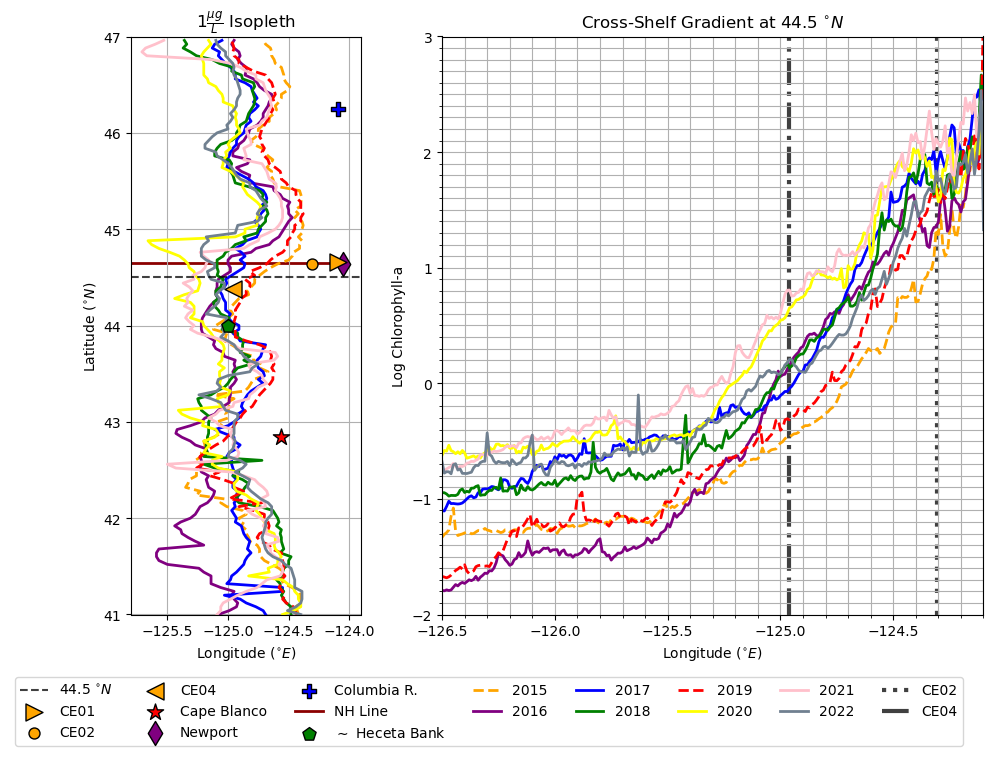

In [7]:
years = range(2015,2023)
fig = plt.figure(figsize = (11,8.5))
grid = (1,3)
ax1 = plt.subplot2grid(grid, (0,0), colspan = 1,rowspan = 1)
ax2 = plt.subplot2grid(grid, (0,1), colspan = 2,rowspan = 1)


years = range(2015, 2023)
line_colors = ['orange','purple','blue','green','red','yellow','pink','slategrey']
line_styles = ['--','-','-','-','--','-','-','-']


for year in years:
    idx = years.index(year)
    jds = datetime.strptime(f'{year}-190', '%Y-%j')
    jde = datetime.strptime(f'{year}-280', '%Y-%j')
    lat, lon, chl= oc.aggregate_oc(jds,jde)    
    ds = xr.Dataset(coords = dict(lon = (['x','y'],lon), lat = (['x','y'],lat)),data_vars = dict(chl = (['x','y'],chl)))
    df = ds.to_dataframe()
    df['lat'] = np.round(df.lat,2)
    
    df1 = df[df.chl <= 1]
    if year == 2016:
        df1 = df1[df1.lon <= -124.27]
    elif year == 2019:
        df1 = df1[df1.lon <= -124.27]
 
    conts = pd.DataFrame()
    unique_lats = np.unique(df1.lat)
    for lat in unique_lats:
        _df1 = df1[df1.lat == lat]
        lon_df1= _df1[_df1.lon < float(np.nanpercentile(_df1.lon,[97.5]))]
        lon_df1 = lon_df1[lon_df1.lon > float(np.nanpercentile(_df1.lon,[2.5]))]
        lon_df1 = lon_df1[lon_df1.lon == lon_df1.lon.max()]
        if len(lon_df1) != 1:
            raise ValueError
        else:
            conts = pd.concat([conts,lon_df1])
    conts = conts.reset_index(drop = True) 
    spline = make_interp_spline(conts.lat,conts.lon)
    new_x = np.arange(41,47,0.04)
    new_y = spline(new_x)  
    
    
    ax1.plot(new_y, new_x, color = line_colors[idx], linewidth = 2, linestyle = line_styles[idx])
    
    
    _l = 44.50
    logdf = df[df.lat == _l]
    ax2.plot(logdf.lon, np.log(logdf.chl), label = str(year), linewidth = 2, color = line_colors[idx],linestyle = line_styles[idx])


ax1.set_ylabel(r'Latitude ($^{\circ}N$)')  
ax1.set_xlabel(r'Longitude ($^{\circ}E$)') 

ax1.axhline(44.5, color = 'black', linestyle = '--', alpha = 0.75, label = r'44.5 $^{\circ}N$')
ax1.scatter(CE01_LOC[1], CE01_LOC[0], marker = '>', label = 'CE01', edgecolors = 'black',facecolors = 'orange', s= 150,zorder = 3)
ax1.scatter(CE02_LOC[1], CE02_LOC[0], marker = '.', label = 'CE02', edgecolors = 'black',facecolors = 'orange', s= 250,zorder = 2)
ax1.scatter(CE04_LOC[1], CE04_LOC[0], marker = '<', label = 'CE04', edgecolors = 'black',facecolors = 'orange', s = 150,zorder = 2)
ax1.scatter(BLANCO_LOC[1], BLANCO_LOC[0], marker = '*', label = 'Cape Blanco', edgecolors = 'black',facecolors = 'red', s = 150,zorder = 2)
ax1.scatter(NEWPORT_LOC[1], NEWPORT_LOC[0], marker = 'd', label = 'Newport', edgecolors = 'black',facecolors = 'purple', s = 150,zorder = 2)
ax1.scatter(CR_LOC[1], CR_LOC[0], marker = 'P', label = 'Columbia R.', edgecolors = 'black',facecolors = 'blue', s = 100,zorder = 2)
ax1.plot(NH_LINE[1],(NH_LINE[0],NH_LINE[0]), color = 'darkred', zorder = 1,linewidth = 2,label = 'NH Line')
ax1.scatter(HECETA_LOC[1], HECETA_LOC[0], marker = 'p', label = r'$\sim$ Heceta Bank', edgecolors = 'black',facecolors = 'green', s = 100,zorder = 2)

ax1.grid()
ax1.set_ylim(41,47)
ax1.set_xlim(-125.8,-123.9)
    
ax2.set_ylabel(r'Log Chlorophyll-a') 
ax2.set_xlabel(r'Longitude ($^{\circ}E$)') 
ax2.axvline(CE02_LOC[1], color = 'black', linestyle = ':', linewidth = 3,zorder = 0, alpha = 0.75, label = 'CE02') 
ax2.axvline(CE04_LOC[1], color = 'black', linestyle = '-.', linewidth = 3, zorder = 0, alpha = 0.75, label = 'CE04')
ax2.set_ylim(-2,3)
ax2.set_xlim(-126.5, -124.1)


ax2.set_xticks(np.arange(-126.5,-124,0.1), minor = True)
ax2.set_yticks(np.arange(-2,3,0.1), minor = True)

ax2.grid(which = 'minor')
ax2.grid(which = 'major')

ax1.set_title(r"$1 \frac{\mu{g}}{L}$ Isopleth")
ax2.set_title(r"Cross-Shelf Gradient at 44.5 $^{\circ}N$")

ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()

_handles = ax1_handles + ax2_handles
_labels = ax1_labels + ax2_labels


plt.subplots_adjust(bottom = 0.2,wspace = 0.35)
fig.legend(_handles, _labels, ncol = 8, loc = (0.015,0.03))
plt.savefig(figure_save_filepath,dpi = 1200)

## Position WRT Shelf Break

In [8]:
%%capture

years = range(2015,2023)
isopleth1 = pd.DataFrame()
for year in years:
    idx = years.index(year)
    jds = datetime.strptime(f'{year}-190', '%Y-%j')
    jde = datetime.strptime(f'{year}-280', '%Y-%j')
    lat, lon, chl= oc.aggregate_oc(jds,jde)    
    ds = xr.Dataset(coords = dict(lon = (['x','y'],lon), lat = (['x','y'],lat)),data_vars = dict(chl = (['x','y'],chl)))
    df = ds.to_dataframe()
    df['lat'] = np.round(df.lat,2)

    _l = 44.50
    logdf = df[df.lat == _l]
    logdf['lg'] = np.log(logdf.chl)
    _df = logdf[(logdf.lg > -.01) & (logdf.lg < 0.1)]
    _df['lg'] = _df.lg.abs()
    _df = _df[_df.lg == _df.lg.min()]
    
    d = {'year': [year],'lon': _df.lon.values}
    
    isopleth1 = pd.concat([isopleth1, pd.DataFrame(d)])
isopleth1 = isopleth1.reset_index(drop = True)
isopleth1['delta_from_shelf_break'] = -124.65 - isopleth1.lon

In [9]:
%%capture

years = range(2015,2023)
isopleth3 = pd.DataFrame()
for year in years:
    idx = years.index(year)
    jds = datetime.strptime(f'{year}-190', '%Y-%j')
    jde = datetime.strptime(f'{year}-276', '%Y-%j')
    lat, lon, chl= oc.aggregate_oc(jds,jde)    
    ds = xr.Dataset(coords = dict(lon = (['x','y'],lon), lat = (['x','y'],lat)),data_vars = dict(chl = (['x','y'],chl)))
    df = ds.to_dataframe()
    df['lat'] = np.round(df.lat,2)

    _l = 44.5
    logdf = df[df.lat == _l]
    logdf['lg'] = np.log(logdf.chl)
    _df = logdf[(logdf.lg > 0.9) & (logdf.lg <1.1)]
    _df['lg'] = _df.lg.abs()
    _df = _df[_df.lg == _df.lg.min()]
    
    d = {'year': [year],'lon': _df.lon.values}
    
    isopleth3 = pd.concat([isopleth3, pd.DataFrame(d)])
isopleth3 = isopleth3.reset_index(drop = True)
isopleth3['delta_from_shelf_break'] = -124.65 - isopleth3.lon

In [10]:
isopleth1

,year,lon,delta_from_shelf_break
0,2015,-124.71,0.06
1,2016,-125.03,0.38
2,2017,-124.94,0.29
3,2018,-125.02,0.37
4,2019,-124.78,0.13
5,2020,-125.21,0.56
6,2021,-125.24,0.59
7,2022,-125.10,0.45


In [11]:
isopleth3

,year,lon,delta_from_shelf_break
0,2015,-124.36,-0.29
1,2016,-124.62,-0.03
2,2017,-124.68,0.03
3,2018,-124.60,-0.05
4,2019,-124.53,-0.12
5,2020,-124.82,0.17
6,2021,-124.89,0.24
7,2022,-124.55,-0.10
